# **Chatbot with DNN**

**Importing Libraries**

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import json
import pickle
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
nltk.download('punkt')
import random

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


**File uploading**

In [ ]:
import io
import os
from google.colab import files
## Uploading the file
file_upload = files.upload()

Saving data.json to data.json


In [ ]:
# reading the file
data_file = open('/content/data.json').read()
intents = json.loads(data_file)

**Data Preprocessing**
* Appending Data to the list

In [ ]:
words=[]
classes = []
documents = []
ignore_words = ['?', '!']

for intent in intents['intents']:
    for pattern in intent['patterns']:
        #tokenize each word
        w = nltk.word_tokenize(pattern)
        words.extend(w)
        #add documents in the corpus
        documents.append((w, intent['tag']))
        # add to our classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

In [ ]:
nltk.download('wordnet')
# lemmaztize and lower each word and remove duplicates
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))
# sort classes
classes = sorted(list(set(classes)))
# documents = combination between patterns and intents
print (len(documents), "documents")
# classes = intents
print (len(classes), "classes", classes)
# words = all words, vocabulary
print (len(words), "unique lemmatized words", words)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
29 documents
10 classes ['deepression', 'feeling', 'goodbye', 'greeting', 'overthinking', 'overthinking-continue', 'overthinking-continue1', 'overthinking-continue2', 'overthinking-continue3', 'thanks']
61 unique lemmatized words ["'m", "'s", ',', 'about', 'all', 'am', 'anyone', 'are', 'awesome', 'bye', 'chatting', 'confused', 'day', 'depressed', 'depression', 'ear', 'feeling', 'for', 'good', 'goodbye', 'great', 'hello', 'helpful', 'helping', 'hey', 'hi', 'hola', 'how', 'i', 'in', 'is', 'it', 'later', 'life', 'm', 'me', 'more', 'next', 'nice', 'not', 'of', 'overthink', 'overthinking', 'sad', 'see', 'some', 'stressed', 'symptom', 'tell', 'thank', 'thanks', 'that', 'there', 'think', 'till', 'time', 'to', 'very', 'what', 'you', '’']


In [ ]:
pickle.dump(words,open('texts.pkl','wb'))
pickle.dump(classes,open('labels.pkl','wb'))

In [ ]:
# create our training data
training = []
# create an empty array for our output
output_empty = [0] * len(classes)
# training set, bag of words for each sentence
for doc in documents:
    # initialize our bag of words
    bag = []
    # list of tokenized words for the pattern
    pattern_words = doc[0]
    # lemmatize each word - create base word, in attempt to represent related words
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]
    # create our bag of words array with 1, if word match found in current pattern
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)
    
    # output is a '0' for each tag and '1' for current tag (for each pattern)
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1
    
    training.append([bag, output_row])
# shuffle our features and turn into np.array
random.shuffle(training)
training = np.array(training)
# create train and test lists. X - patterns, Y - intents
train_x = list(training[:,0])
train_y = list(training[:,1])
print("Training data created")

Training data created


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


**Building Model**

In [ ]:
# Create model - 3 layers. First layer 128 neurons, second layer 64 neurons and 3rd output layer contains number of neurons
# equal to number of intents to predict output intent with softmax
model = Sequential()
model.add(Dense(128, input_shape=(len(train_x[0]),), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]), activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               7936      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 16,842
Trainable params: 16,842
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
hist = model.fit(np.array(train_x), np.array(train_y), epochs=200, batch_size=5, verbose=1)

Epoch 1/200
6/6 [==============================] - 1s 2ms/step - loss: 2.3539 - accuracy: 0.1379
Epoch 2/200
6/6 [==============================] - 0s 2ms/step - loss: 2.2957 - accuracy: 0.1379
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 2.1939 - accuracy: 0.2069
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 2.1578 - accuracy: 0.2759
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 2.1272 - accuracy: 0.3448
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 2.1841 - accuracy: 0.3103
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 2.1080 - accuracy: 0.3448
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 2.0782 - accuracy: 0.3793
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 2.0176 - accuracy: 0.4483
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 2.0093 - accuracy: 0.3793
Epoch 11/200
6/6 [===========

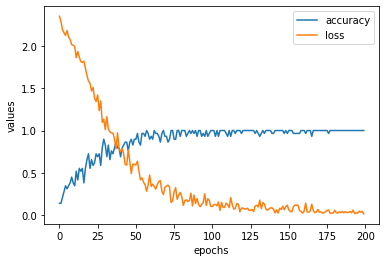

In [ ]:

# Model Accuracy
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'],label='training set accuracy')
plt.plot(hist.history['loss'],label='training set loss')
plt.legend(['accuracy','loss'])
plt.xlabel("epochs")
plt.ylabel("values")
plt.show()


Above plot shows that the model achieved 100% accuracy after 58 iterations only. Also, the model loss is reduced after every epoch with 0.05 at 200th  epoch.

**Model with L2 Regularization**

In [ ]:
from tensorflow import keras
l2_model = keras.Sequential([
    keras.layers.Dense(128, kernel_regularizer=keras.regularizers.l2(0.1),input_shape=(len(train_x[0]),), activation='relu'),
    keras.layers.Dense(64, kernel_regularizer=keras.regularizers.l2(0.001), activation='relu'),
    keras.layers.Dense(len(train_y[0]), activation='softmax')
  ])

In [ ]:
l2_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               7936      
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 16,842
Trainable params: 16,842
Non-trainable params: 0
_________________________________________________________________


In [ ]:
l2_model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])


In [ ]:
l2_hist = l2_model.fit(np.array(train_x), np.array(train_y), epochs=200, batch_size=5, verbose=1)

Epoch 1/200
6/6 [==============================] - 0s 2ms/step - loss: 10.3071 - accuracy: 0.2069
Epoch 2/200
6/6 [==============================] - 0s 2ms/step - loss: 9.4731 - accuracy: 0.3103
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 8.7204 - accuracy: 0.3103
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 8.0324 - accuracy: 0.3103
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 7.3991 - accuracy: 0.3793
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 6.8205 - accuracy: 0.4483
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 6.2894 - accuracy: 0.4828
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 5.8072 - accuracy: 0.5172
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 5.3688 - accuracy: 0.5517
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 4.9625 - accuracy: 0.5862
Epoch 11/200
6/6 [==========

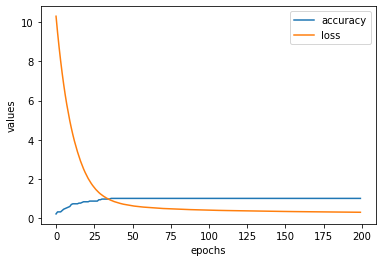

In [ ]:
# Model Accuracy
import matplotlib.pyplot as plt
plt.plot(l2_hist.history['accuracy'],label='training set accuracy')
plt.plot(l2_hist.history['loss'],label='training set loss')
plt.legend(['accuracy','loss'])
plt.xlabel("epochs")
plt.ylabel("values")
plt.show()

After Regularization the model has improved a lot and shows no spikes.Also 100% accuracy is achieved after 37 iterations only. Also, the model loss is 0.29 at 200th  epoch.

In [ ]:
model.save('model.h5', hist)